## Exercise: Build a linear regression model to predict fish weight

Using the fish dataset in this repo (location relative to this notebook: `../datasets/fish/Fish.csv`) do the following:

1. Split the data into labels and features, with the "weight" column being the label and the other columns as features.
2. Drop all the "species" information from the input features (we'll assume all fish are similarly dense...).
3. Split the fish data into training and validation sets.
4. Fit the model!
5. Score the model, what is this value? How should you interpret it?
    * Hint, the default is this: [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
6. Examine the coefficents and intercept value...
    * Which coefficent is tied to which input feature?
    * Are there any that seem especially large, or otherwise strange?
    * According to your model, what is the formula that maps fish features to fish weight?
7. Compute and plot the residuals (error) of the validation scores.
    * Hint, computing residuals: [https://stackoverflow.com/questions/55095437/in-python-sklearn-regression-is-there-a-command-to-return-residuals-for-all-rec](https://stackoverflow.com/questions/55095437/in-python-sklearn-regression-is-there-a-command-to-return-residuals-for-all-rec)
    * Hint, creating a scatterplot: [https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)
    * Do you see any signs of heteroscedasticity or autocorrelation?
    

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Load the data
fish_dataset = pd.read_csv('../data/Fish.csv')
fish_dataset.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [23]:
# 1. split the data into labels and features
labels = fish_dataset['Weight']
features = fish_dataset.drop(columns=['Species', 'Weight'])

# 2. test/train split
training_data, test_data, training_labels, test_labels = train_test_split(features, labels, test_size=0.2)

In [24]:
# Just checking...
training_data.head(5)

,Length1,Length2,Length3,Height,Width
122,37.1,40.0,42.5,11.1350,6.6300
63,16.3,17.7,19.8,7.4052,2.6730
53,25.0,27.0,30.6,8.5680,4.7736
140,48.3,51.7,55.1,8.9262,6.1712
20,31.3,34.0,39.5,15.1285,5.5695


In [25]:
training_labels.head(5)

122    820.0
63      90.0
53     272.0
140    950.0
20     575.0
Name: Weight, dtype: float64

In [26]:
# 4. Fitting the model
model = LinearRegression()
model.fit(training_data, training_labels)

LinearRegression()

In [27]:
# 5. score the model
model.score(test_data, test_labels)

0.915693249059921

##### 5b What is this?

This value is r^2 also called the "coefficent of determination" and it is a measure of your model's performance. Specifically it is the share of the variance captured by the model. It will always be between 0-1. A rule of thumb: better than .6 is not so bad.

In this case it's saying the model captures 76% of the variance in fish weights. Another way to think about it is that our model can explain 89% of the contributing factors to a fish's weight **IN OUR TEST DATA**, and 11% of the factors **IN OUR TEST DATA** are not captured by the model. 

Be wary though... rerun your notebook and see that this value changes when we change the test_train_split. We'll introduce cross validation soon as a method for obtaining a more robust measure of this model's performance. But keep in mind all the metrics you can generate are still just **with respect to the data you have** and many models are quite sensitive to changes in the data or patterns that are not captured in our data but exist in truth. 

A couple other notes:

* Most phenomona have some noise involved, even when you have quite a lot of features, so an r^2 of 1 or very close to 1 should be met with a lot of skepticism.
    * Check for "target leakage" where the labels/targets are being included in your training data directly or indirectly.
    * Ask yourself "could this phenomenon really be perfectly predicted given this data?"
        * If that seems unbelievable, it probably is. Check your model and data!
* Check for overfitting by scoring the model on the training data as well as the test data!
    * If the values are similar, that's a good sign.
    * If the values are highly divergent that's a bad sign.
    * If the training score is high and the test score is low, that's overfitting specifically.


In [13]:
model.score(training_data, training_labels)

0.8864160551954379

**Looks like our test and train were similar, which is good!**

In [14]:
# 6. Examine the coefficents and the intercept
print(model.coef_, model.intercept_, '\n')

# 6b. The coefs are in the same order as the input lables in the dataframe so:
# L1, L2, L3, H, W, meaning the formula could be expressed like this:
formula = 'Length1*{:.2f} + Length2*{:.2f} Length3*{:.2f} Height*{:.2f} Width*{:.2f} + {:.2f}'.format(*model.coef_, model.intercept_)
print(formula)

[ 58.34214466   0.27180831 -29.37146612  27.6088508    4.35812367] -485.08256114640955 

Length1*58.34 + Length2*0.27 Length3*-29.37 Height*27.61 Width*4.36 + -485.08


## Notes:

Do any seem especially large, or otherwise strange? **I say yes to both**

* Length1 is about 3x larger than the next largest, and so dominates the other features.
* Also, the negative values in L2 and L3 are a bit surprising if we think about what this model is doing...

A simple "expert system" that performed this mapping would be completely additive, the formula would be something like:

```
estimated_volume = ((L1 + L2 + L3) / 3) * W * H * some_scalar_value
estimated_weight = estimated_volumne * avg_fish_density
```

Maybe the fish density and the scalar would be specific to the fish species (which we left off this time) but seeing `-23 and -25` is strange given the actual phenomenon we're working with. Each unit of length in L2 and L3 **subtract** weight from the fish?

**Dig Deeper, if this is indeed strange, can we explain why it's happening?**

...

...

I suspect that these features are strongly correlated. Just like height and armspan are correlated, it stands to reason that bigger fish are bigger in multiple directions not just a single direction. This would certainly explain the values we see. 

**Dig Even Deeper: Lets test that hypothesis, it's possible to measure the featurewise correlation's in our data!**

In [15]:
correlation_matrix = fish_dataset.drop(columns=['Species']).corr()

/Users/raykhorsandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/raykhorsandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


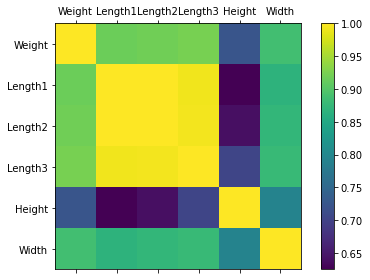

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
cor_matrix_image = ax.matshow(correlation_matrix)
fig.colorbar(cor_matrix_image)

ax.set_xticklabels(fish_dataset.columns)
ax.set_yticklabels(fish_dataset.columns)

plt.tight_layout()
plt.show()

# These warnings are apparently a bug in this version of matplotlib?
# ignore them.
# https://github.com/pandas-dev/pandas/issues/35684

**Now that's a lot of colinearity!**

L1, L2, and L3 appear to have near perfect correlation, violating one of our assumptions! The other vaulues are also relatively well correlated, note that the heatmap values START at 0.65, whereas completely uncorrelated features would score 0.00.

**Discuss... how could we address this?**

...

...

...

There are at least two reasonable things to do: 

* Feature selection: choose just a single value out of L1, L2, and L3 (the most strongly correlated variables)
    * You might even consider removing more of these values since so many are so correlated.
* Feature engineering: Combine some of the features into a single value.
    * And drop the values used to create that new feature...
    
#### Lets do an example of that!

In [17]:
# Drop L2 and L3 and just use L1.
selected_dataset = fish_dataset.drop(columns=['Length2', 'Length3'])

selected_dataset.head(5)

,Species,Weight,Length1,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


In [18]:
# Combine L1, L2, L3 into a single value and use it instead of the original 3
engineered_dataset = fish_dataset.copy()
engineered_dataset['AvgLength'] = (engineered_dataset['Length1'] + engineered_dataset['Length2'] + engineered_dataset['Length3']) / 3
engineered_dataset = engineered_dataset.drop(columns=['Length1', 'Length2', 'Length3'])

engineered_dataset.head(5)

,Species,Weight,Height,Width,AvgLength
0,Bream,242.0,11.5200,4.0200,26.200000
1,Bream,290.0,12.4800,4.3056,27.166667
2,Bream,340.0,12.3778,4.6961,27.166667
3,Bream,363.0,12.7300,4.4555,29.600000
4,Bream,430.0,12.4440,5.1340,29.833333


In [19]:
# Combine everything into a single value :O
heavily_engineered_dataset = fish_dataset.copy()
heavily_engineered_dataset['EstimatedVolume'] = (
    ((heavily_engineered_dataset['Length1'] + heavily_engineered_dataset['Length2'] + heavily_engineered_dataset['Length3']) / 3) *
    heavily_engineered_dataset['Width'] * heavily_engineered_dataset['Height']
)

heavily_engineered_dataset = heavily_engineered_dataset.drop(
    columns = ['Length1', 'Length2', 'Length3', 'Width', 'Height']
)

heavily_engineered_dataset.head(5)

,Species,Weight,EstimatedVolume
0,Bream,242.0,1213.332480
1,Bream,290.0,1459.770624
2,Bream,340.0,1579.127335
3,Bream,363.0,1678.868044
4,Bream,430.0,1905.976964


In [20]:
# Now lets just reperform the above for each dataset
for dataset in [selected_dataset, engineered_dataset, heavily_engineered_dataset]:
    labels = dataset['Weight']
    features = dataset.drop(columns=['Species', 'Weight'])

    training_data, test_data, training_labels, test_labels = train_test_split(features, labels, test_size=0.2)

    model.fit(training_data, training_labels)
    r2 = model.score(test_data, test_labels)
    
    print('\n=======\n')
    print(r2)
    print(training_data.columns)
    print(model.coef_, model.intercept_, '\n')



0.9087269815954652
Index(['Length1', 'Height', 'Width'], dtype='object')
[23.17669016 13.54825654 45.14065172] -533.7601072139007 



0.8622898192385892
Index(['Height', 'Width', 'AvgLength'], dtype='object')
[10.96117189 57.0607515  19.52608328] -512.5355070137547 



0.7842299607566329
Index(['EstimatedVolume'], dtype='object')
[0.22804036] 30.225514132459807 



## Note:

We can see that the feature selection and engineering processes don't have significantly different performance... But we don't have to struggle to intepret the coef values with weird negative numbers. In fact, with the heavily engineered dataset we can essentially think of the coef as the model's prediction for "avg fish density." 

### Okay finally the last part:

Compute and plot the residuals (error) of the validation scores.

(Note that I'm computing the residuals with respect to the model trained on heavily_engineered_dataset but it works the same with all these models.)

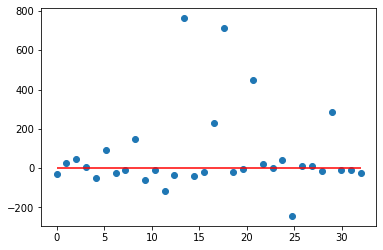

In [21]:
predictions = model.predict(test_data)
residuals = (test_labels - predictions)

plt.scatter(np.linspace(0, len(residuals), len(residuals)), residuals)
plt.hlines(0, 0, len(residuals), color='r')

## Note

I don't see evidence of heteroscedasticity or autocorrelation. But I do see evidence of a biased error (meaning the conditional mean isn't zero) — this chart looks like our estimator is biased to *underestimate* the fish's weight. We can easily double check that:

In [22]:
residual_mean = np.mean(residuals)
print(residual_mean)

66.4995478316267


**And indeed, the conditional mean on test data is negative.**

This isn't a deal breaker... but it is something to be aware of and could be a starting point for further exploration: Why is our fish weight model consistently underpredicting fish weight?